# Makeup Products Recommender System

## Goals

To build several recommender systems for current users and potential users with different approaches: 

__Demographic filtering:__ based purely on overall ratings of products  

__Collaborative filtering:__ based on user-item interaction history

__Content based filtering:__ based on product features and user features __in this file__

__Hybrid model:__ based on user feature, item feature, and interaction, potentially recommending products to new users according to user input 

## Dataset overview

This system used a private dataset scrapped from https://www.sephora.com containing product details and user reviews history, including 13K products, 210K users, 325K reviews. I've put them into 2 csv files:

> __'all_primary_products.csv':__

__product_id:__       product identifier<br>
__sku_id:__           identifier for different colors within one product<br>
__category:__         category this product belongs to, i.e. eye, face, lip...<br>
__name:__ prodcut name<br>
__brand:__ product brand<br>
__price:__ product price at the time of webcrawling<br>
__product_url:__ product url<br>
__image_url:__ url of the main product image<br>
__rating:__ overall average rating<br>
__reviews_count:__ number of reviews on this product<br>
__loves_count:__ number of 'love' clicked on this product<br>
__color_count:__ color counts of the product, if any. e.g. accessories normally have 0 colors, but foundations could have several different	colours<br>
__details:__ detailed product discription<br>
__sku_group:__ different colors within one product<br>
__similar_products:__ similar products defined by merchant<br>
__bought_together:__ products that usually bought together<br>
__is_listed:__ whether the product is available at the time of webcrawling


> __'all_users_reviews.csv':__

__product_id:__       product identifier<br>
__product_name:__ prodcut name<br>	product_url: product url<br>
__user_nickname:__ 	user nickname<br>
__author_id:__ user identifier	<br>
__location:__ user location<br>
__eye_color:__ user eye color on file	<br>
__hair_color:__ user hair color on file<br>
__skin_tone:__ user skin tone on file<br>
__skin_type:__ user skin type on file<br>
__age_range:__ user age range on file<br>
__rating:__ rating this user gave to this product, on scale 1-5<br>
__review_title:__ title of user review<br>
__review_text:__ text of this review<br>
__is_recommended:__ whether this user recommend this product, '1' recommend, '0' not recommend<br>
__submission_time:__ time of the review submission<br>
__helpful_count:__ number of people who think this review is helpful<br>
__not_helpful_count:__ number of people who think this review is not helpful<br>
__helpfulness:__ helpful_count/(helpful_count+not_helpful_count)<br>

## Data preparation

Import all libs we need

In [1]:
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = [13, 8]

First we have a look at the overall ratings of products

In [2]:
prod=pd.read_csv('all_primary_products.csv')
prod.head()

,product_id,sku_id,category,name,brand,price,product_url,image_url,rating,reviews_count,loves_count,color_count,details,sku_group,similar_products,bought_together,is_listed
0,P432235,2058733.0,eye,Superhero Liner,IT Cosmetics,32.0,https://www.sephora.com/product/superhero-line...,https://www.sephora.com/productimages/sku/s205...,4.2308,0,0,0,NaN,[],[],[],no
1,P411833,1875038.0,eye,Blackest Black Eyeshadow Gold Rush,Natasha Denona,37.0,https://www.sephora.com/product/blackest-black...,https://www.sephora.com/productimages/sku/s187...,3.9000,10,2319,1,"What it is:\n A full-coverage, highly pigmente...",['1875038'],"['P404832', 'P63087293', 'P424001', 'P309813',...","['P437713', 'P384060', 'P313025', 'P421738', '...",yes
2,P411302,1865245.0,eye,Precision Felt Eyeliner,Guerlain,49.0,https://www.sephora.com/product/precision-felt...,https://www.sephora.com/productimages/sku/s186...,3.7500,8,795,1,What it is:\nAn eyeliner with a long felt tip ...,['1865245'],"['P403324', 'P230234', 'P253818', 'P245205', '...","['P17876556', 'P429720', 'P313034', 'P416204',...",yes
3,P406816,1811918.0,eye,X-Rated Mascara,Smashbox,28.0,https://www.sephora.com/product/x-rated-mascar...,https://www.sephora.com/productimages/sku/s181...,3.5732,0,0,0,NaN,[],[],[],no
4,P433486,2089423.0,eye,MASCARA VOLUME EFFET FAUX CILS Flash Primer,Yves Saint Laurent,41.0,https://www.sephora.com/product/mascara-volume...,https://www.sephora.com/productimages/sku/s208...,5.0000,0,0,0,NaN,[],[],[],no


In [3]:
prod.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
product_id,3925,3387,P427344,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sku_id,3924,NaN,NaN,NaN,1.87534e+06,307214,48041,1.75423e+06,1.95008e+06,2.0938e+06,2.22557e+06
category,3925,7,eye,1083,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,3925,3341,Lipstick,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,3925,144,SEPHORA COLLECTION,330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,3925,NaN,NaN,NaN,41.0424,28.6192,2,26,35,49,526
product_url,3925,3387,https://www.sephora.com/product/prismatic-mult...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
image_url,3925,3377,https://www.sephora.com/productimages/sku/s202...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,3925,NaN,NaN,NaN,4.04721,0.83468,0,3.8776,4.2289,4.5,5
reviews_count,3925,NaN,NaN,NaN,370.905,1098.22,0,1,42,275,17000


Sereval observations on the raw data:

1, sku_id indicates different colors within the same product. But since all the ratings/reviews/loves are based on products, this additional infomation will be discarded. 

2, is_listed=no means the product is discontinued right now, thus should not appear in our recommendation system.

3, The product details are useful for a content based filtering system, but are currently beyond the scope. The same applies to sku_group, similar_products and bought_together.


In [4]:
prod=prod[prod['is_listed']=='yes']
prod=prod[prod['rating']!=0]
columns_to_drop=['sku_group','similar_products','bought_together','details','sku_id','color_count','is_listed']
prod=prod.drop(columns_to_drop, axis=1)
prod.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
product_id,2962,2539,P427344,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,2962,7,eye,816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,2962,2515,Concealer Pencil,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,2962,124,SEPHORA COLLECTION,302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,2962,NaN,NaN,NaN,40.1456,28.3333,2,25,35,48,526
product_url,2962,2539,https://www.sephora.com/product/prismatic-mult...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
image_url,2962,2532,https://www.sephora.com/productimages/sku/s202...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,2962,NaN,NaN,NaN,4.17017,0.47743,1,3.93843,4.25,4.5,5
reviews_count,2962,NaN,NaN,NaN,491.484,1240.58,0,25,107,450.25,17000
loves_count,2962,NaN,NaN,NaN,31328.4,63525.8,0,4356,11448,30574,1.17586e+06


## Collaborative filtering

Let's take a look at next data file, with product-user interaction.

In [5]:
ratings=pd.read_csv('all_users_reviews.csv')

In [6]:
prod=prod[prod['product_id'].isin(ratings['product_id'])]
ratings=ratings[ratings['product_id'].isin(prod['product_id'])]

In [7]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323957 entries, 0 to 324110
Data columns (total 19 columns):
product_id           323957 non-null object
product_name         323957 non-null object
product_url          323894 non-null object
user_nickname        321985 non-null object
author_id            323957 non-null object
location             48530 non-null object
eye_color            262973 non-null object
hair_color           223266 non-null object
skin_tone            239441 non-null object
skin_type            239441 non-null object
age_range            78746 non-null object
rating               323957 non-null int64
review_title         236168 non-null object
review_text          323957 non-null object
is_recommended       323957 non-null int64
submission_time      323957 non-null object
helpful_count        323957 non-null int64
not_helpful_count    323957 non-null int64
helpfulness          151748 non-null float64
dtypes: float64(1), int64(4), object(14)
memory usage: 49.

In [8]:
n_users=len(ratings['author_id'].unique())
n_items=len(ratings['product_id'].unique())
n_users, n_items

(209895, 2410)

In [9]:
len(prod['product_id'].unique())

2410

### Matrix factorization using TensorRec

Now let's try another Matrix factorization method: TensorRec.

TensorRec is a Python package for building recommender systems. A TensorRec recommender system consumes three pieces of input data: user features, item features, and interactions. Based on the user/item features, the system will predict which items to recommend. The interactions are used when fitting the model: predictions are compared to the interactions and a loss/penalty is calculated, which the system learns to decrease.

In [10]:
import tensorrec

In [11]:
#Create internal index in order to create sparse matrices
user_id_internal=range(n_users)
prod_id_internal=range(n_items)
user_id_dict=dict(zip(ratings['author_id'].unique().tolist(),user_id_internal))
prod_id_dict=dict(zip(ratings['product_id'].unique().tolist(),prod_id_internal))

In [12]:
ratings['user_id']=ratings['author_id'].map(user_id_dict)

In [13]:
ratings['item_id']=ratings['product_id'].map(prod_id_dict)

In [14]:
ratings.sample(frac=1).reset_index(drop=True)  # Shuffles the rows in-place
cutoff = int(0.8 * len(ratings))
train_ratings = ratings[:cutoff]
test_ratings = ratings[cutoff:]

In [15]:
from scipy import sparse
def interactions_to_sparse_matrix(interactions):
    return sparse.coo_matrix((interactions['rating'].values, (interactions['user_id'].values, interactions['item_id'].values)),
                             shape=(n_users, n_items))

# Create sparse matrices of interaction data
sparse_train_ratings = interactions_to_sparse_matrix(train_ratings)
sparse_test_ratings = interactions_to_sparse_matrix(test_ratings)

In [16]:
# Create sets of train/test interactions that are only ratings 4 or 5
sparse_train_ratings_4plus = sparse_train_ratings.multiply(sparse_train_ratings >= 4.0)
sparse_test_ratings_4plus = sparse_test_ratings.multiply(sparse_test_ratings >= 4.0)

Fit the model with a loss function: WMRB 

In [17]:
user_indicator_features = sparse.identity(n_users)
item_indicator_features = sparse.identity(n_items)

In [18]:
def train_and_save_collaborative():
    print("Training collaborative filter")

    ranking_cf_model = tensorrec.TensorRec(n_components=5)
    ranking_cf_model.fit(interactions=sparse_train_ratings_4plus,
                     user_features=user_indicator_features,
                     item_features=item_indicator_features,
                     n_sampled_items=int(n_items * .01))
    # Save the trained model to disk
    ranking_cf_model.save_model("trained_model_interaction")
    

In [19]:
#train_and_save_collaborative()

In [20]:
# Load trained model from disk
#saved_model_interaction = tensorrec.TensorRec.load_model("trained_model_interaction")

Let's check the result using a metric called “recall at K.” Recall@K says, for the average user, what percentage of their test items made it in to the top K in the predicted rankings. In other words, if we get a recall@10 value of .06, then there is a 6% chance that a particular product I should like will make it in to my top 10 recommendations.

In [21]:
# This method consumes item ranks for each user and prints out recall@10 train/test metrics
def check_results(ranks):
    train_recall_at_10 = tensorrec.eval.recall_at_k(
        test_interactions=sparse_train_ratings_4plus,
        predicted_ranks=ranks,
        k=10
    ).mean()
    test_recall_at_10 = tensorrec.eval.recall_at_k(
        test_interactions=sparse_test_ratings_4plus,
        predicted_ranks=ranks,
        k=10
    ).mean()
    print("Recall at 10: Train: {:.4f} Test: {:.4f}".format(train_recall_at_10,
                                                            test_recall_at_10))

In [22]:
#predicted_ranks_interaction = saved_model_interaction.predict_rank(user_features=user_indicator_features,item_features=item_indicator_features)
#check_results(predicted_ranks_interaction)

Looks pretty good! This means given any product that I would like, there's a 10% chance it will show up on my screen if the website suggests 7 products. Given the total number of products, I think this is not bad.

## Content based filtering

One difference between the nature of a makeup product recommender on a shopping website and a movie recommender is that a lot of users only bought/rated a very small number of products, so the interaction history may not be very useful for generalization. Additionally, movie websites face frequent users, while a shopping website for makeup products could have a lot of new users as potential customers. To attract these users by providing matching recommendations based on minimal user input is key for business. 

Thus I will now try to make a new model intergrating detailed product features and user features, then build a final hybrid model combining collaborative and content based approaches.

First let's look at the metadata we have:

In [23]:
prod.head()

,product_id,category,name,brand,price,product_url,image_url,rating,reviews_count,loves_count
1,P411833,eye,Blackest Black Eyeshadow Gold Rush,Natasha Denona,37.0,https://www.sephora.com/product/blackest-black...,https://www.sephora.com/productimages/sku/s187...,3.900,10,2319
2,P411302,eye,Precision Felt Eyeliner,Guerlain,49.0,https://www.sephora.com/product/precision-felt...,https://www.sephora.com/productimages/sku/s186...,3.750,8,795
13,P422622,eye,Essential Shadow Palette Luna,ILIA,53.0,https://www.sephora.com/product/essential-shad...,https://www.sephora.com/productimages/sku/s197...,4.500,4,1219
15,P393946,eye,Double Lines Eyeliner,Ciaté London,24.0,https://www.sephora.com/product/double-lines-P...,https://www.sephora.com/productimages/sku/s166...,2.975,40,1666
17,P419279,eye,High Standards Eyebrow Brush,Pretty Vulgar,24.5,https://www.sephora.com/product/high-standards...,https://www.sephora.com/productimages/sku/s194...,4.500,12,3383


Brand, price and overall weighted score could serve as product features.

In [24]:
#map product feature to internal item id
prod['item_id']=prod['product_id'].map(prod_id_dict)

Now put brand feature to matrix

In [25]:
# Transfer users features to sparse binary matrix
def features_to_binary_matrix(input_values, index, ids):
    value_by_id = pd.Series(input_values, index=index).to_dict()
    values = [{value_by_id[id]} for id in ids]
    mlb = MultiLabelBinarizer()
    features = mlb.fit_transform(values)
    print(mlb.classes_)
    matrix = sparse.coo_matrix(features)
    return matrix

In [26]:
print("Product brand classes: ")
product_brand_features = features_to_binary_matrix(prod.brand.values,prod.item_id,prod_id_internal)

Product brand classes: 
['AERIN' 'AMOREPACIFIC' 'Aether Beauty' 'Algenist' 'Amazing Cosmetics'
 'Anastasia Beverly Hills' 'Antonym' 'Artis' 'Artist Couture' 'BECCA'
 'Benefit Cosmetics' 'Bite Beauty' 'Black Up' 'Blinc' 'Blinking Beauté'
 'Bobbi Brown' 'Buxom' 'Bésame Cosmetics' 'CLINIQUE' 'COVER FX' 'Caudalie'
 'Charlotte Tilbury' 'Ciaté London' 'Cinema Secrets' 'Clarins'
 'DOMINIQUE COSMETICS' 'DUO' 'Deborah Lippmann' 'Dermalogica' 'Diamancel'
 'Dior' 'Dr. Brandt Skincare' 'Dr. Dennis Gross Skincare' 'Dr. Jart+'
 'Drunk Elephant' 'Drybar' 'Estée Lauder' 'Eve Lom' 'FARSÁLI'
 'FENTY BEAUTY by Rihanna' 'Farmacy' 'First Aid Beauty' 'Fresh' 'GLAMGLOW'
 'GLO Science' 'Giorgio Armani Beauty' 'Givenchy' 'Grande Cosmetics'
 'Guerlain' 'HUDA BEAUTY' 'Hourglass' 'ILIA' 'INC.redible' 'IT Cosmetics'
 'Jack Black' 'Josie Maran' 'Jouer Cosmetics' 'KEVYN AUCOIN'
 'KORA Organics' 'KOSAS' 'Kaja' 'Kat Von D' "Kiehl's Since 1851"
 'Koh Gen Do' 'Kopari' "L'Occitane" 'LANEIGE' 'LASHFOOD' 'LAWLESS' 'LXMI'
 

Price feature is a little different, it makes more sense to price in bins and binarize them than use price as floats.

In [27]:
minprice=min(prod['price'])
minprice

2.0

In [28]:
maxprice=max(prod['price'])
maxprice

526.0

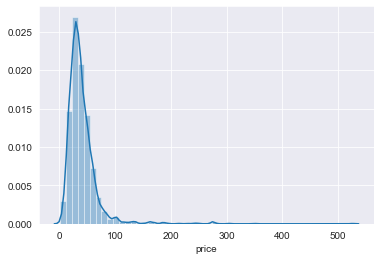

In [29]:
sns.distplot(prod['price'])

In [30]:
bins = [0, 10, 20, 30,50,75,100,150,200,300,400,550]
labels = ['bin0-10','bin10-20','bin20-30','bin30-40','bin50-75','bin75-100','bin100-150','bin150-200','bin200-300','bin300-400','bin400-550']
prod['binned_price'] = pd.cut(prod['price'], bins=bins, labels=labels)

In [31]:
print("Product price bins classes: ")
product_price_features = features_to_binary_matrix(prod.binned_price.values,prod.item_id,prod_id_internal)

Product price bins classes: 
['bin0-10' 'bin10-20' 'bin100-150' 'bin150-200' 'bin20-30' 'bin200-300'
 'bin30-40' 'bin300-400' 'bin400-550' 'bin50-75' 'bin75-100']


In [32]:
item_features=sparse.hstack([product_brand_features, product_price_features])

In [33]:
def train_and_save_item_feature():
    print("Training content-based filter with item features")

    ranking_cf_model_item_feature = tensorrec.TensorRec(n_components=11)
    ranking_cf_model_item_feature.fit(interactions=sparse_train_ratings_4plus,
                     user_features=user_indicator_features,
                     item_features=item_features,
                     n_sampled_items=int(n_items * .01))
    ranking_cf_model_item_feature.save_model("trained_model_item_feature")

In [34]:
train_and_save_item_feature()

W0703 22:55:56.245675  9880 tensorrec.py:580] n_sampled_items was specified, but the loss graph is not sample-based


Training content-based filter with item features


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tenso

In [35]:
saved_model_item_feature = tensorrec.TensorRec.load_model("trained_model_item_feature")

In [36]:
predicted_ranks_item_feature = saved_model_item_feature.predict_rank(user_features=user_indicator_features,item_features=item_features)
check_results(predicted_ranks_item_feature)

Recall at 10: Train: 0.0217 Test: 0.0035


Not as good as the previous one based on interactions. Probably it's better to combine interactions, item features and user features together. Next step let's include user features first.